
# Project: Investigate a Dataset - Database_Ncis_and_Census_data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The chosen dataset has two tables one with population estimates and census counts and the other with gun records and permits across the 55 states of the USA. The gun data table includes columns subdivided between hand guns and long guns, that is, returns, rentals, redeemed, prepawn, and private. It also includes other details like permits. the ncis census data is mainly about population demographics across the 55 states between 1998 and 2017. This includes real population counts and predictions for estimates in the years after the counts.  


### Question(s) for Analysis

1. Which state from the sample data set has the highest risk for gun crime in April 2010?

2. Which state from the sample data set has the lowest risk for potential gun crime in April 2010?

3. What is the general relationship between female and housing unit populations across all states in the sample data set in   April 2010?

4. what is the general relationship between permits and long guns in the sample data set?

In [471]:
# importing relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings


# Imported packages and their role

 Pandas  provides a DataFrame object
 
 NumPy   provides high-level mathematical functions
 
 matplotlib.pyplot creates interactive visualizations
 
 %matplotlib inline links IPython to matplotlib package
 
 Seaborn adds quality to visualizations through attractive statistical graphics

<a id='wrangling'></a>
## Data Wrangling




### General Properties

I will create a sample dataset of 7 states, and clean them free of duplicates, insert proper data types, get rid of NaN values as well as extraneous columns and rename some of the column title labels to maintain a little bit of consistency. I will also narrow my time focus down to April 2010.  

In [472]:
# loading US census data and gun data into pandas data frames respectively

ncis_cens_df = pd.read_csv('u.s.-census-data.csv')
gun_data_df  = pd.read_excel('gun-data.xlsx')

In [473]:
warnings.filterwarnings('ignore') # suppressing warning messages to make work look neater

In [474]:
# displaying loaded ncis census DataFrame
ncis_cens_df

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


I invoke the read_csv() and read_excel() function to enable me load the different file formats successfully  

In [475]:
# invoking the info() function to give general overview about the relation as summarised information 

ncis_cens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [476]:
# invoking the .shape function to display total number of rows and columns in the relation

ncis_cens_df.shape

(85, 52)

All data columns in the census data frame have the object data types, recognized as strings

The data types of all the state columns will have to be converted to integers

The census data frame has 85 rows by 52 columns

In [477]:
# gun_data DataFrame general column summary
gun_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [478]:
# displaying number of rows and columns as a tuple

gun_data_df.shape

(12485, 27)

The gun_data data frame has 12485 rows by 27 columns

The month column data type is a string and will need to be converted to a date-time data type

All the long and hand gun related data column float data types will need to be converted to integer data types to reflect discrete numbers that can be clearly counted  

In [479]:
# number of rows with atleast one missing value in ncis_cens_df DataFrame

ncis_cens_df.isna().any(axis=1).sum()

69

The census data frame has 69 rows with at least one missing value. These will be dropped later on.

In [480]:
# number of rows with atleast one missing value in gun_data_df DataFrame

gun_data_df.isna().any(axis=1).sum()

11715

The gun data data frame has 11715 rows with at least one missing value.

In [481]:
# number of duplicated rows in the census data

ncis_cens_df.duplicated().sum()

3

The census data has 3 rows with duplicate values. These duplicate values are also missing values.

In [482]:
# number of duplicated rows in the gun data

gun_data_df.duplicated().sum()

0

The gun data data frame is free from any duplicate row values.

In [483]:
# frequency of each unique value under the month data column in the gun_data data frame 

gun_data_df['month'].value_counts()

2002-02    55
2007-09    55
2003-07    55
2008-12    55
2003-10    55
2001-04    55
2016-07    55
2016-08    55
2006-10    55
2002-05    55
2010-03    55
2014-11    55
2000-09    55
2007-10    55
2003-03    55
2011-11    55
2013-05    55
2017-02    55
2014-12    55
1998-12    55
2013-08    55
2000-01    55
2004-09    55
2012-07    55
2016-06    55
2005-06    55
1999-05    55
2010-10    55
2015-05    55
2003-04    55
           ..
2005-05    55
2001-01    55
2007-02    55
2006-09    55
2004-07    55
1999-02    55
2009-11    55
2015-03    55
1999-11    55
2007-05    55
1999-03    55
2008-04    55
2010-12    55
2004-11    55
2007-11    55
2009-04    55
2009-02    55
2014-03    55
2017-07    55
2017-06    55
2012-12    55
2016-09    55
2003-12    55
2003-06    55
2009-09    55
2000-12    55
2002-12    55
2005-09    55
2007-12    55
2006-08    55
Name: month, Length: 227, dtype: int64

The gun data data frame has a standard count of 55 entries for each unique month value between 1998 and 2017

In [484]:
# frequency of each unique value under the state data column in the gun_data data frame

gun_data_df['state'].value_counts()

West Virginia           227
Georgia                 227
Utah                    227
California              227
Colorado                227
Missouri                227
Kansas                  227
Illinois                227
Mississippi             227
Oregon                  227
Oklahoma                227
Louisiana               227
Montana                 227
South Dakota            227
Texas                   227
Massachusetts           227
Mariana Islands         227
Kentucky                227
Connecticut             227
Maryland                227
Tennessee               227
District of Columbia    227
New Mexico              227
Alabama                 227
Pennsylvania            227
Delaware                227
Arkansas                227
Rhode Island            227
Washington              227
Virginia                227
North Carolina          227
Michigan                227
South Carolina          227
Florida                 227
Minnesota               227
Vermont             

In [485]:
# sum of unique values in the gun_data state column

gun_data_df['state'].nunique()

55

The state data column in the gun_data dataframe has 55 unique values each representing a single state across the United States. 

Each state unique value is repeated about 227 times

In [486]:
# frequency of each unique value in the Fact column of the ncis_cens_df DataFrame

ncis_cens_df['Fact'].value_counts()

Foreign born persons, percent, 2011-2015                                                 1
In civilian labor force, female, percent of population age 16 years+, 2011-2015          1
Persons 65 years and over, percent,  July 1, 2016,  (V2016)                              1
White alone, percent, July 1, 2016,  (V2016)                                             1
Two or More Races, percent, July 1, 2016,  (V2016)                                       1
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    1
Nonminority-owned firms, 2012                                                            1
Mean travel time to work (minutes), workers age 16 years+, 2011-2015                     1
(c)                                                                                      1
Black or African American alone, percent, July 1, 2016,  (V2016)                         1
In civilian labor force, total, percent of population age 16 years+, 2011-2015           1

In [487]:
# sum of unique values in the ncis_cens_df Fact data column 

ncis_cens_df['Fact'].nunique()

80

The number of unique values under the Fact data column in the census_data dataframe is 80

In [488]:
# function displaying a datatype for each individual column in the ncis_cens_df DataFrame

ncis_cens_df.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


I intend to rename some of the column labels with spaces to be replaced with underscores

I also intend to trim down the census_data dataframe to about 8 columns

The 7 columns will include Fact, Alabama, Arkansas, California, South Carolina, South Dakota, Washington, West Virginia

I will limit the Fact column to about three entries, housing units, census, april 1, 2010, population, census, april 1, 2020, females, percent, april 1, 2010.

In [489]:
# function displayin a specific data type for each individual column in the gun_data_df DataFrame

gun_data_df.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

I intend to trim down the gun_data dataframe to about 5 columns.

The 7 columns will include month, state, permit, handgun, long_gun, rentals_handgun and rentals_long_gun.

I will also change the handgun label to include an underscore between hand and gun so it can appear as hand_gun

I will also limit the month column to entries to April, 2010, and the state column to the 7 states I chose earlier.

### Data Cleaning 

In [490]:
# returning the total number of duplicate rows in the ncis_cens_df DataFrame

ncis_cens_df.duplicated().sum()

3

The census dataset currently has 3 duplicated rows

In [491]:
# retaining first unique row and deleting the duplicate rows that follow thereafter

ncis_cens_df.drop_duplicates(keep='first',inplace=True)

I invoke the drop_duplicates inbuilt function to get rid of the duplicate rows that come after the first unique row   

In [492]:
# checking to confirm if all duplicate rows that follow have been deleted successfully, zero means the operation was successful

ncis_cens_df.duplicated().sum()

0

I check the census dataset to confirm whether the duplicated rows have been successfully dropped which is true 

In [493]:
# assigning a new variable name as cleaning_data_0 and trimming the ncis census DataFrame to about 7 state columns

cleaning_data_0 = ncis_cens_df[['Fact','Alabama','Arkansas','California','South Carolina','South Dakota','Washington','West Virginia']]
cleaning_data_0

,Fact,Alabama,Arkansas,California,South Carolina,South Dakota,Washington,West Virginia
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","2,988,248","39,250,017",4961119,865454,"7,288,000","1,831,102"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","2,916,025","37,254,522",4625410,814195,"6,724,545","1,853,011"
2,"Population, percent change - April 1, 2010 (es...",1.70%,2.50%,5.40%,0.073,0.063,8.40%,-1.20%
3,"Population, Census, April 1, 2010","4,779,736","2,915,918","37,253,956",4625364,814180,"6,724,540","1,852,994"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,6.40%,6.30%,0.059,0.071,6.20%,5.50%
5,"Persons under 5 years, percent, April 1, 2010",6.40%,6.80%,6.80%,0.065,0.073,6.50%,5.60%
6,"Persons under 18 years, percent, July 1, 2016,...",22.60%,23.60%,23.20%,0.221,0.246,22.40%,20.50%
7,"Persons under 18 years, percent, April 1, 2010",23.70%,24.40%,25.00%,0.234,0.249,23.50%,20.90%
8,"Persons 65 years and over, percent, July 1, 2...",16.10%,16.30%,13.60%,0.167,0.16,14.80%,18.80%
9,"Persons 65 years and over, percent, April 1, 2010",13.80%,14.40%,11.40%,0.137,0.143,12.30%,16.00%


I drop extraneous columns by creating a new DataFrame with 8 columns that I have chosen to put my focus on. I then run the new DataFrame to confirm the new changes.

In [494]:
# extracting rows that are related to April 2010 and dropping the rest the loc[] and isin([]) functions

cleaning_data_0 = cleaning_data_0.loc[cleaning_data_0['Fact'].isin(['Population, Census, April 1, 2010','Female persons, percent, April 1, 2010','Housing units, April 1, 2010'])]
cleaning_data_0

,Fact,Alabama,Arkansas,California,South Carolina,South Dakota,Washington,West Virginia
3,"Population, Census, April 1, 2010","4,779,736","2,915,918","37,253,956",4625364,814180,"6,724,540","1,852,994"
11,"Female persons, percent, April 1, 2010",51.50%,50.90%,50.30%,0.514,0.5,50.20%,50.70%
23,"Housing units, April 1, 2010","2,171,853","1,316,299","13,680,081",2137683,363438,"2,885,677","881,917"


I drop extraneous rows by creating a new DataFrame with 3 rows plus the 8 columns. I run the new DataFrame to confirm the changes

In [495]:
# renaming the column labels for cleaning_data_0 DataFrame to lowercase string characters

cleaning_data_0.columns=['fact','alabama','arkansas','california','south_carolina','south_dakota','washington','west_virginia']
cleaning_data_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 3 to 23
Data columns (total 8 columns):
fact              3 non-null object
alabama           3 non-null object
arkansas          3 non-null object
california        3 non-null object
south_carolina    3 non-null object
south_dakota      3 non-null object
washington        3 non-null object
west_virginia     3 non-null object
dtypes: object(8)
memory usage: 216.0+ bytes


I rename the available column titles and invoke the info() function to provide a short summary of the columns to confirm the changes. I change the title names to lowercase completely and include underscores inbetween.

In [496]:
# changing all fact column values to lowercase characters using the lambda function

cleaning_data_0['fact'] = cleaning_data_0['fact'].apply(lambda x: x.lower())
cleaning_data_0

,fact,alabama,arkansas,california,south_carolina,south_dakota,washington,west_virginia
3,"population, census, april 1, 2010","4,779,736","2,915,918","37,253,956",4625364,814180,"6,724,540","1,852,994"
11,"female persons, percent, april 1, 2010",51.50%,50.90%,50.30%,0.514,0.5,50.20%,50.70%
23,"housing units, april 1, 2010","2,171,853","1,316,299","13,680,081",2137683,363438,"2,885,677","881,917"


I change all the fact column values into lowercase completely using the lambda function. This will simplify my Explanatory Data Analysis when comapring variables and looking at the different summary statistics as well as those that are descriptive. 

In [497]:
# deleting the comma string character from alabama and arkansas column values in the 1st row using the translate() and iloc[] functions

cleaning_data_0.iloc[0]['alabama'] = cleaning_data_0.iloc[0]['alabama'].translate({ord(','):None})
cleaning_data_0.iloc[0]['arkansas'] = cleaning_data_0.iloc[0]['arkansas'].translate({ord(','):None})

Now, deleting the comma character in the string objects of large population numbers in the alabama and arkansas columns for the first row. This initiates the conversion process from string objects to integer values.n I invoke the translate function to help carry this out smoothly.

In [498]:
# deleting the comma string character from california and washington column values in the 1st row using the translate() and iloc[] functions

cleaning_data_0.iloc[0]['california'] = cleaning_data_0.iloc[0]['california'].translate({ord(','):None})
cleaning_data_0.iloc[0]['washington'] = cleaning_data_0.iloc[0]['washington'].translate({ord(','):None})    

Deleting the comma character in the string objects of large population numbers in the california and washington columns for the first row. 

In [499]:
# deleting the comma string character from west_virginia and alabama column values in the 1st and 3rd rows respectively using the translate() and iloc[] functions

cleaning_data_0.iloc[0]['west_virginia'] = cleaning_data_0.iloc[0]['west_virginia'].translate({ord(','):None})
cleaning_data_0.iloc[2]['alabama'] = cleaning_data_0.iloc[2]['alabama'].translate({ord(','):None})

Deleting the comma character in the string objects of large population numbers in the west_virginia and alabama columns for the first and third rows respectively 

In [500]:
# deleting the comma string character from arkansas and california column values in the 3rd row using the translate() and iloc[] functions

cleaning_data_0.iloc[2]['arkansas'] = cleaning_data_0.iloc[2]['arkansas'].translate({ord(','):None})
cleaning_data_0.iloc[2]['california'] = cleaning_data_0.iloc[2]['california'].translate({ord(','):None})

Deleting the comma character in the string objects of large population numbers in the arkansas and california columns for the third row

In [501]:
# deleting the comma string character from washington and west_virginia column values in the 3rd row using the translate() and iloc[] functions

cleaning_data_0.iloc[2]['washington'] = cleaning_data_0.iloc[2]['washington'].translate({ord(','):None})
cleaning_data_0.iloc[2]['west_virginia'] = cleaning_data_0.iloc[2]['west_virginia'].translate({ord(','):None})    


Deleting the comma character in the string objects of large population numbers in the washington and west_virginia columns for the third row

In [502]:
# displaying the cleaning_data_0 DataFrame to confirm the new changes

cleaning_data_0

,fact,alabama,arkansas,california,south_carolina,south_dakota,washington,west_virginia
3,"population, census, april 1, 2010",4779736,2915918,37253956,4625364,814180,6724540,1852994
11,"female persons, percent, april 1, 2010",51.50%,50.90%,50.30%,0.514,0.5,50.20%,50.70%
23,"housing units, april 1, 2010",2171853,1316299,13680081,2137683,363438,2885677,881917


Running the new DataFrame to confirm the changes which have been implemented successfully since there are no commas present in the figures.

In [503]:
# converting the data type of alabama, arkansas and california data columns from string objects to long integers in the 1st row

cleaning_data_0.iloc[0]['alabama'] = int(cleaning_data_0.iloc[0]['alabama'],10)
cleaning_data_0.iloc[0]['arkansas'] = int(cleaning_data_0.iloc[0]['arkansas'],10)
cleaning_data_0.iloc[0]['california'] = int(cleaning_data_0.iloc[0]['california'],10)

Converting the data types of the population values in alabama, arkansas and california from string objects to long integers in the first row.  

In [504]:
# converting the data type of south_carolina and south_dakota data columns from string objects to long integers in the 1st row

cleaning_data_0.iloc[0]['south_carolina'] = int(cleaning_data_0.iloc[0]['south_carolina'],10)
cleaning_data_0.iloc[0]['south_dakota'] = int(cleaning_data_0.iloc[0]['south_dakota'],10)

Converting the data types of the population values in south_carolina and south_dakota from string objects to long integers in the first row

In [505]:
# converting the data type of washington and west_virginia data columns from string objects to long integers in the 1st row

cleaning_data_0.iloc[0]['washington'] = int(cleaning_data_0.iloc[0]['washington'],10)
cleaning_data_0.iloc[0]['west_virginia'] = int(cleaning_data_0.iloc[0]['west_virginia'],10)

Converting the data types of the population values in washington and west_virginia from string objects to long integers in the first row

In [506]:
# converting the data type of alabama, arkansas and california data columns from string objects to long integers in the 3rd row

cleaning_data_0.iloc[2]['alabama'] = int(cleaning_data_0.iloc[2]['alabama'],10)
cleaning_data_0.iloc[2]['arkansas'] = int(cleaning_data_0.iloc[2]['arkansas'],10)
cleaning_data_0.iloc[2]['california'] = int(cleaning_data_0.iloc[2]['california'],10)

Converting the data types of the population values in alabama, arkansas and california from string objects to long integers in the third row

In [507]:
# converting the data type of south_carolina and south_dakota data columns from string objects to long integers in the 3rd row

cleaning_data_0.iloc[2]['south_carolina'] = int(cleaning_data_0.iloc[2]['south_carolina'],10)
cleaning_data_0.iloc[2]['south_dakota'] = int(cleaning_data_0.iloc[2]['south_dakota'],10)

Converting the data types of the population values in south_carolina and south_dakota from string objects to long integers in the third row

In [508]:
# converting the data type of washington and west_virginia data columns from string objects to long integers in the 3rd row

cleaning_data_0.iloc[2]['washington'] = int(cleaning_data_0.iloc[2]['washington'],10)
cleaning_data_0.iloc[2]['west_virginia'] = int(cleaning_data_0.iloc[2]['west_virginia'],10)

Converting the data types of the population values in washington and west_virginia from string objects to long integers in the third row.

In [509]:
# returning the long integer data type of the west_virginia data column value in the 3rd row to confirm data type changes 

type(cleaning_data_0.iloc[2]['west_virginia'])

int

checking the data type of one of the third row values in the west_virginia column to confirm the new changes 

In [510]:
# all values in data columns from alabama to california, and 
# washington to west_virginia in the 2nd row stripped of the percentile symbol, converted to floats from strings 
# and divided by 100.0 to represent three significant figures.  

cleaning_data_0.iloc[1]['alabama':'california'] = cleaning_data_0.iloc[1]['alabama':'california'].str.rstrip('%').astype('float')/100.0
cleaning_data_0.iloc[1]['washington':'west_virginia'] = cleaning_data_0.iloc[1]['washington':'west_virginia'].str.rstrip('%').astype('float')/100.0

deleting the percentile character from the string objects in the second row in the alabama to california column range as well as the washington to west_virginia column range. the string objects are then converted to a float data type and divided by 100.0 to support three significant figures.   

In [511]:
# checking the data type of the alabama data column value in the 2nd row, which returns a float

type(cleaning_data_0.iloc[1]['alabama'])

float

when the data type of the specific value in the second row of the alabama column is checked, it returns a float

In [512]:
# checking the data type of the south_dakota data column value in the 2nd row, which returns a string

type(cleaning_data_0.iloc[1]['south_dakota'])

str

when the data type of the specific value in the second row of the south_dakota column is checked, it returns a string

In [513]:
# converting the south_carolina data column value in the 2nd row from a string to a float data type

cleaning_data_0.iloc[1]['south_carolina'] = float(cleaning_data_0.iloc[1]['south_carolina']) 

converting the data type of the south_carolina column value in the second row from a string to a float

In [514]:
# converting the south_dakota data column value in the 2nd row from a string to a float data type

cleaning_data_0.iloc[1]['south_dakota'] = float(cleaning_data_0.iloc[1]['south_dakota']) 

converting the data type of the south_dakota column value in the second row from a string to a float

In [515]:
# returning the product of the 1st row and 2nd row data column values of alabama to south_carolina 
# in integers rounded to the nearest whole number

cleaning_data_0.iloc[1]['alabama'] = int(round(cleaning_data_0.iloc[1]['alabama']*cleaning_data_0.iloc[0]['alabama'],0))
cleaning_data_0.iloc[1]['arkansas'] = int(round(cleaning_data_0.iloc[1]['arkansas']*cleaning_data_0.iloc[0]['arkansas'],0))
cleaning_data_0.iloc[1]['california'] = int(round(cleaning_data_0.iloc[1]['california']*cleaning_data_0.iloc[0]['california'],0))
cleaning_data_0.iloc[1]['south_carolina'] = int(round(cleaning_data_0.iloc[1]['south_carolina']*cleaning_data_0.iloc[0]['south_carolina'],0))

converting the female percent rates for the 2010 April population census to wholesome numbers by multiplication between row 1 and row 2 values across all states.

In [516]:
# returning the product of the 1st row and 2nd row data column values of south_dakota to west_virginia 
# in integers rounded to the nearest whole number

cleaning_data_0.iloc[1]['south_dakota'] = int(round(cleaning_data_0.iloc[1]['south_dakota']*cleaning_data_0.iloc[0]['south_dakota'],0))
cleaning_data_0.iloc[1]['washington'] = int(round(cleaning_data_0.iloc[1]['washington']*cleaning_data_0.iloc[0]['washington'],0))
cleaning_data_0.iloc[1]['west_virginia'] = int(round(cleaning_data_0.iloc[1]['west_virginia']*cleaning_data_0.iloc[0]['west_virginia'],0))

converting the female percent rates for the 2010 April population census to wholesome numbers by multiplication between row 1 and row 2 values across all states. 

In [517]:
# returning the new DataFrame of cleaning_data_0 to confirm the new values which were successful

cleaning_data_0

,fact,alabama,arkansas,california,south_carolina,south_dakota,washington,west_virginia
3,"population, census, april 1, 2010",4779736,2915918,37253956,4625364,814180,6724540,1852994
11,"female persons, percent, april 1, 2010",2461564,1484202,18738740,2377437,407090,3375719,939468
23,"housing units, april 1, 2010",2171853,1316299,13680081,2137683,363438,2885677,881917


running the new DataFrame to confirm the product value changes in the second row.

In [518]:
# using the info() function to display the summary of all data columns in the cleaning_data_0 DataFrame

cleaning_data_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 3 to 23
Data columns (total 8 columns):
fact              3 non-null object
alabama           3 non-null object
arkansas          3 non-null object
california        3 non-null object
south_carolina    3 non-null object
south_dakota      3 non-null object
washington        3 non-null object
west_virginia     3 non-null object
dtypes: object(8)
memory usage: 216.0+ bytes


when I invoke the info() function for the new cleaning_data_0 DataFrame, the results return a summary of string objects for each column in the current DataFrame

In [519]:
# converting entire data columns of the cleaning_data_0 DataFrame from strings to integers from alabama to california 
# since they still appear as string objects when displayed above

cleaning_data_0['alabama'] = cleaning_data_0['alabama'].astype(int) 
cleaning_data_0['arkansas'] = cleaning_data_0['arkansas'].astype(int)
cleaning_data_0['california'] = cleaning_data_0['california'].astype(int)

I repeat the conversion process for entire columns from alabama to california in this new DataFrame to ensure the notebook no longer recognizes them as string objects.

In [520]:
# converting entire data columns of the cleaning_data_0 DataFrame from strings to integers from south_carolina to west_virginia 
# since they still appear as string objects when displayed above

cleaning_data_0['south_carolina'] = cleaning_data_0['south_carolina'].astype(int)
cleaning_data_0['south_dakota'] = cleaning_data_0['south_dakota'].astype(int)
cleaning_data_0['washington'] = cleaning_data_0['washington'].astype(int)
cleaning_data_0['west_virginia'] = cleaning_data_0['west_virginia'].astype(int)

I repeat the conversion process for entire columns from south_carolina to west_virginia in this new DataFrame to ensure the notebook no longer recognizes them as string objects.

In [521]:
# storing the cleaning_data_o DataFrame into a new variable named sample_data_0 to prepare for the next stage operations 

sample_data_0 = cleaning_data_0

storing the new DataFrame in a new variable name, that is, sample_data_0

In [522]:
# returning the new DataFrame summarised data column information to confirm the changes

sample_data_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 3 to 23
Data columns (total 8 columns):
fact              3 non-null object
alabama           3 non-null int64
arkansas          3 non-null int64
california        3 non-null int64
south_carolina    3 non-null int64
south_dakota      3 non-null int64
washington        3 non-null int64
west_virginia     3 non-null int64
dtypes: int64(7), object(1)
memory usage: 216.0+ bytes


I invoke the info() function after the immediate changes to confirm which is successful.

In [523]:
# creating a query DataFrame from the gun_data records for the April month in 2010 and storing it into the same gun_data_df DataFrame

gun_data_df = gun_data_df.query('month == "2010-04"')

creating a new query pandas DataFrame for April 2010 and storing it with same variable name as before 

In [524]:
# dropping extraneous data columns in the gun_data DataFrame to retain about five relevant data columns

cleaning_data_1 = gun_data_df[['month','state','permit','handgun','long_gun']]
cleaning_data_1

,month,state,permit,handgun,long_gun
4895,2010-04,Alabama,396.0,8727.0,8095.0
4896,2010-04,Alaska,0.0,2650.0,3136.0
4897,2010-04,Arizona,1905.0,7787.0,5097.0
4898,2010-04,Arkansas,4303.0,3865.0,3833.0
4899,2010-04,California,26930.0,26170.0,27650.0
4900,2010-04,Colorado,0.0,10998.0,9403.0
4901,2010-04,Connecticut,8726.0,3994.0,3098.0
4902,2010-04,Delaware,0.0,772.0,626.0
4903,2010-04,District of Columbia,0.0,29.0,1.0
4904,2010-04,Florida,1.0,26817.0,12952.0


dropping extraneous columns and retaining permits, handgun and long_gun as my columns for the future explanatory analysis  

In [525]:
# returning a summary of all the data columns with missing values which no longer exist at the moment

cleaning_data_1.isnull().sum()

month       0
state       0
permit      0
handgun     0
long_gun    0
dtype: int64

checking for any missing values in the cleaning_data_1 DataFrame by invoking the isnull() and sum() functions aggregate the number of missing values across all columns in the current DataFrame.

In [526]:
# converting the data type of month from a string object to datetime

cleaning_data_1['month']=pd.to_datetime(cleaning_data_1['month'])
cleaning_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 4895 to 4949
Data columns (total 5 columns):
month       55 non-null datetime64[ns]
state       55 non-null object
permit      55 non-null float64
handgun     55 non-null float64
long_gun    55 non-null float64
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 2.6+ KB


convertng the string objects under the month column to a datetime data type

In [527]:
# converting the permit data column from a float to an integer data type

cleaning_data_1['permit'] = cleaning_data_1['permit'].astype('int64')

converting the permit column data type from a float to an integer

In [528]:
# converting the handgun data column from a float to an integer data type

cleaning_data_1['handgun'] = cleaning_data_1['handgun'].astype('int64')

converting the handgun column data type from a float to an integer

In [529]:
# converting the long_gun data column from a float to an integer data type 

cleaning_data_1['long_gun'] = cleaning_data_1['long_gun'].astype('int64')

converting the long_gun column data type from a float to an integer

In [530]:
# invoking a summary of all the data columns in the cleaning_data_1 DataFrame to confirm the new data type changes which are 
# seen to be successful

cleaning_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 4895 to 4949
Data columns (total 5 columns):
month       55 non-null datetime64[ns]
state       55 non-null object
permit      55 non-null int64
handgun     55 non-null int64
long_gun    55 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.6+ KB


checking to confirm data type changes in the cleaning_data_1 DataFrame which is sucessful

In [531]:
# dropping extraneous rows to limit the DataFrame to only seven states using the iloc[] and isin([]) functions 

cleaning_data_1 = cleaning_data_1.loc[cleaning_data_1['state'].isin(['Alabama','Arkansas','California','South Carolina','South Dakota','Washington','West Virginia'])]
cleaning_data_1

,month,state,permit,handgun,long_gun
4895,2010-04-01,Alabama,396,8727,8095
4898,2010-04-01,Arkansas,4303,3865,3833
4899,2010-04-01,California,26930,26170,27650
4938,2010-04-01,South Carolina,4330,5313,3336
4939,2010-04-01,South Dakota,0,1396,2785
4946,2010-04-01,Washington,6830,10384,7986
4947,2010-04-01,West Virginia,0,3927,4534


dropping extraneous rows to narrow the pandas DataFrame down to only 7 states under the state column. the .loc[] function is called to extract to extract these unique rows

In [532]:
# renaming the handgun data column label to include an underscore between hand and gun

cleaning_data_1.rename(columns={'handgun':'hand_gun'},inplace=True)
cleaning_data_1

,month,state,permit,hand_gun,long_gun
4895,2010-04-01,Alabama,396,8727,8095
4898,2010-04-01,Arkansas,4303,3865,3833
4899,2010-04-01,California,26930,26170,27650
4938,2010-04-01,South Carolina,4330,5313,3336
4939,2010-04-01,South Dakota,0,1396,2785
4946,2010-04-01,Washington,6830,10384,7986
4947,2010-04-01,West Virginia,0,3927,4534


renaming the handgun column title to hand_gun to include an underscore 

In [533]:
# converting all the state data column values into lowercase characters using the lamda and lower functions

cleaning_data_1['state'] = cleaning_data_1['state'].apply(lambda x: x.lower())
cleaning_data_1

,month,state,permit,hand_gun,long_gun
4895,2010-04-01,alabama,396,8727,8095
4898,2010-04-01,arkansas,4303,3865,3833
4899,2010-04-01,california,26930,26170,27650
4938,2010-04-01,south carolina,4330,5313,3336
4939,2010-04-01,south dakota,0,1396,2785
4946,2010-04-01,washington,6830,10384,7986
4947,2010-04-01,west virginia,0,3927,4534


converting all state column values to lowercase characters completely

In [534]:
# using row index location numbers to rename some state data column values for consistency purposes with the gun_data dataset
# which are south_carolina, south_dakota and west_virginia

cleaning_data_1.at[4938, 'state']='south_carolina'
cleaning_data_1.at[4939, 'state']='south_dakota'
cleaning_data_1.at[4947, 'state']='west_virginia'
cleaning_data_1

,month,state,permit,hand_gun,long_gun
4895,2010-04-01,alabama,396,8727,8095
4898,2010-04-01,arkansas,4303,3865,3833
4899,2010-04-01,california,26930,26170,27650
4938,2010-04-01,south_carolina,4330,5313,3336
4939,2010-04-01,south_dakota,0,1396,2785
4946,2010-04-01,washington,6830,10384,7986
4947,2010-04-01,west_virginia,0,3927,4534


Using the 'at[]' function to immediately swap old state values with space characters for new state values with underscores. Notable changes are south_carolina, south_dakota and west_virginia. This is done for consistency purposes when we cross over into Exploratory Data Analysis shortly after here. 

In [535]:
# checking for any duplicate rows in the newly trimmed dataset for cleaning_data_1 DataFrame

cleaning_data_1.duplicated().sum()

0

checking for any available duplicate rows, which are confirmed to be non existent at the moment.

In [536]:
# assigninn the cleaning_data_1 DataFrame a new variable name, that is, sample_data_1 
# for use in the next stage of Exploratory Data Analysis

sample_data_1 = cleaning_data_1

storing the cleaning_data_1 DataFrame into sample_data_1 

<a id='eda'></a>
## Exploratory Data Analysis

Computing statistics and creating visualizations

### Which columns under sample_data_1 are skewed more to the left and right respectively?

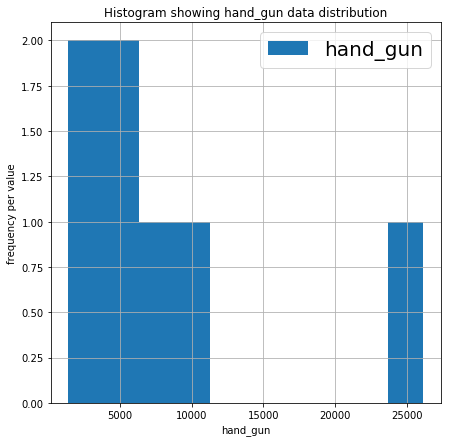

In [537]:
# plotting a histogram for the hand_gun data column in the sample_data_1 dataset

sample_data_1.hand_gun.hist(figsize = (7,7));
plt.xlabel('hand_gun');
plt.ylabel('frequency per value');
plt.title('Histogram showing hand_gun data distribution');
plt.legend(['hand_gun'],prop ={'size':20});


The hand_gun column is skewed more to the right

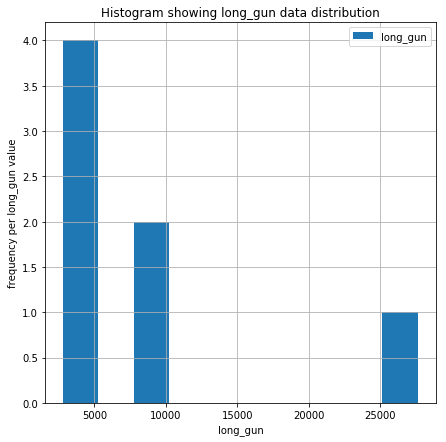

In [538]:
# plotting histogram showing long_gun data distribution as well as the accompanying chart labels

sample_data_1.long_gun.hist(figsize=(7,7));
plt.xlabel('long_gun');
plt.ylabel('frequency per long_gun value');
plt.title('Histogram showing long_gun data distribution');
plt.legend(['long_gun']);

The long_gun column is skewed more to the right

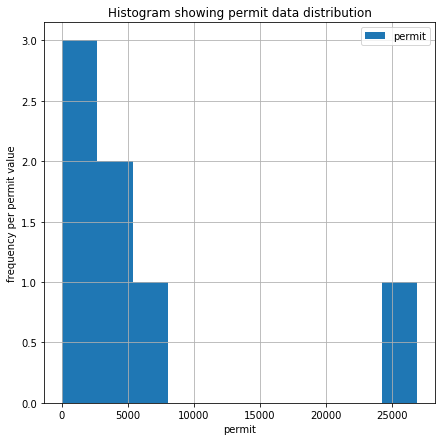

In [539]:
# plotting histogram showing the permit data distribution

sample_data_1.permit.hist(figsize=(7,7));
plt.xlabel('permit');
plt.ylabel('frequency per permit value');
plt.title('Histogram showing permit data distribution');
plt.legend(['permit']);

The permit column is skewed to the right

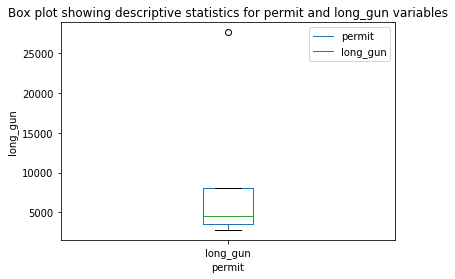

In [540]:
# plotting the box plot between permit and the long_gun variables to show the descriptive statistics between them.

sample_data_1.plot(x='permit',y='long_gun',kind='box');
plt.xlabel('permit');
plt.ylabel('long_gun');
plt.title('Box plot showing descriptive statistics for permit and long_gun variables');
plt.legend(['permit','long_gun']);

long_gun and permit variables have only one outier 

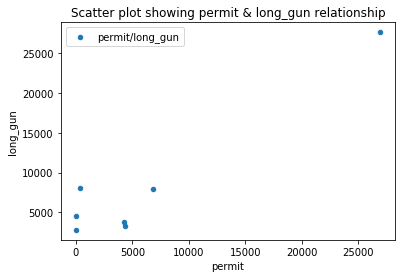

In [541]:
# scatter plot showing the relationship between the permit long_gun variables

sample_data_1.plot(x='permit',y='long_gun',kind='scatter');
plt.xlabel('permit');
plt.ylabel('long_gun');
plt.title('Scatter plot showing permit & long_gun relationship');
plt.legend(['permit/long_gun']);

There is a weak positive correlation between permit and long_gun variables

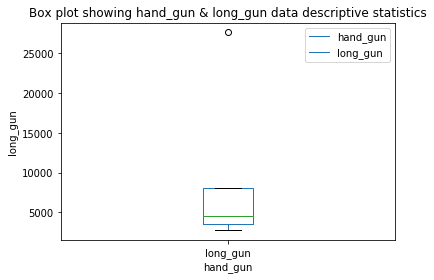

In [542]:
# Box plot showing descriptive statistics between the hand_gun and the long_gun variables

sample_data_1.plot(x='hand_gun',y='long_gun',kind='box');
plt.xlabel('hand_gun');
plt.ylabel('long_gun');
plt.title('Box plot showing hand_gun & long_gun data descriptive statistics');
plt.legend(['hand_gun','long_gun']);

There is only one outlier between hand_guns and long_guns which is linked to the state of California. It has a huge arsenal of guns sold out to its population in April 2010

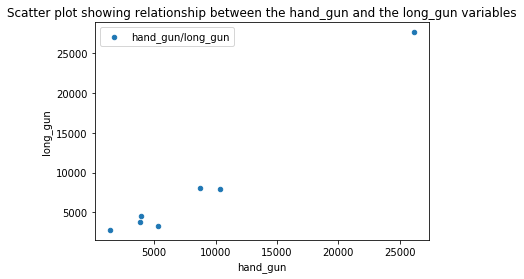

In [543]:
# Scatter plot showing the relationship between the hand_gun and the long_gun variables

sample_data_1.plot(x='hand_gun',y='long_gun',kind='scatter');
plt.xlabel('hand_gun');
plt.ylabel('long_gun');
plt.title('Scatter plot showing relationship between the hand_gun and the long_gun variables');
plt.legend(['hand_gun/long_gun']);

There exists a strong correlation between the hand_gun and long_gun variables.

### Which state has the highest gun crime risk? 

### Which state has the lowest gun crime risk?

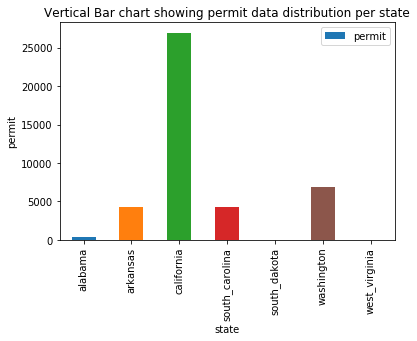

In [544]:
# vertical bar graph chart showing the distribution of permits across the seven states 

sample_data_1.plot(x='state', y ='permit', kind='bar');
plt.xlabel('state');
plt.ylabel('permit');
plt.title('Vertical Bar chart showing permit data distribution per state');
plt.legend(['permit']);

In [545]:
# returning value for the permit data column in the 3rd row of the sample_data_1 DataFrame 

sample_data_1.iloc[2]['permit']

26930

California state takes the lead with the highest number of gun permits issued out in the month of April 2010. 26930 permits  

In [546]:
# returning value for the permit data column in the 7th row of the sample_data_1 DataFrame 

sample_data_1.iloc[6]['permit']

0

retrieving exact number of permits issued in west_virginia

In [547]:
# returning value for the permit data column in the 5th row of the sample_data_1 DataFrame 

sample_data_1.iloc[4]['permit']

0

retrieving exact number of permits issued in south_dakota

west_virginia and south_dakota have the lowest permit tally in April 2010, no gun permit was issued out for these states 

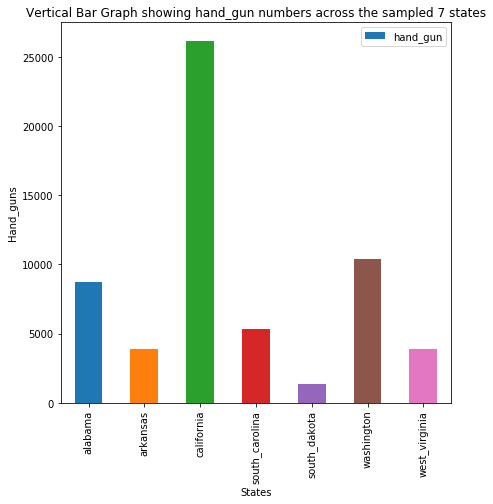

In [548]:
# plotting the vertical bar graph chart for the hand_gun and state variables showing the hand_gun data 
# distribution across all states

sample_data_1.plot(x='state',y='hand_gun',kind='bar',figsize=(7,7));
plt.xlabel('States');
plt.ylabel('Hand_guns');
plt.legend();
plt.title('Vertical Bar Graph showing hand_gun numbers across the sampled 7 states');

In [549]:
# number of hand_guns in the state of California

sample_data_1.iloc[2]['hand_gun']

26170

In [550]:
# number of hand_guns in the state of south_dakota

sample_data_1.iloc[4]['hand_gun']

1396

California state has the highest number of hand_guns sold out in April 2010. These were 26170 hand_guns while south_dakota has the lowest number of hand_guns sold out to its population. These were 1396 hand_guns.

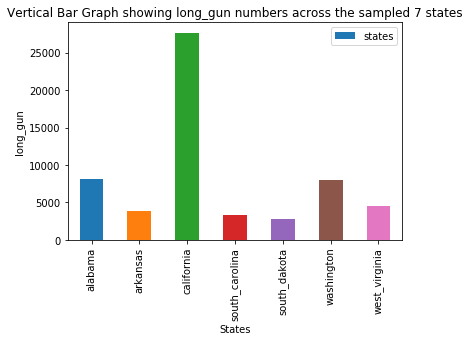

In [551]:
# plotting a vertical bar graph showing the distribution of long_gun data across the 7 states  

sample_data_1.plot(x='state',y='long_gun',kind='bar',label='states');

plt.xlabel('States');
plt.ylabel('long_gun');
plt.legend();
plt.title('Vertical Bar Graph showing long_gun numbers across the sampled 7 states'); 


In [552]:
# returning the California long_gun data column value in the 3rd row

sample_data_1.iloc[2]['long_gun']

27650

In [553]:
# returning the south_dakota long_gun data column value in the 5th row

sample_data_1.iloc[4]['long_gun']

2785

South Dakota has the lowest long_gun tally at 2785 long_guns.

California has the highest long_gun tally at 27650 long_guns.

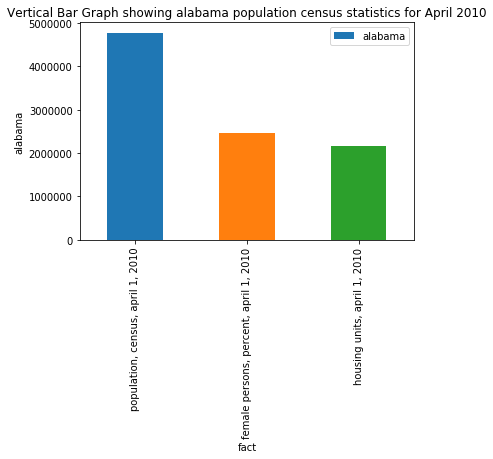

In [554]:
# vertical bar graph showing the alabama population census statistics for April 2010

sample_data_0.plot(x='fact',y='alabama',kind='bar');

plt.xlabel('fact');
plt.ylabel('alabama');
plt.legend();
plt.title('Vertical Bar Graph showing alabama population census statistics for April 2010'); 


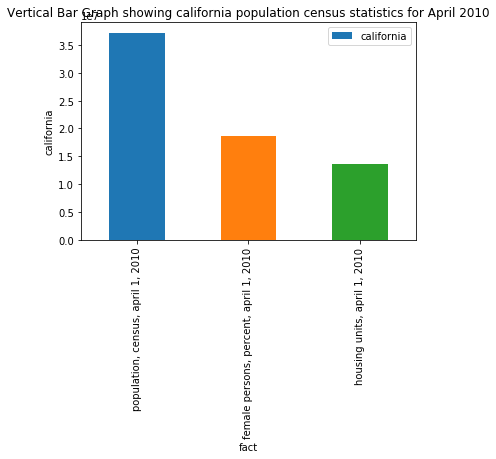

In [555]:
# vertical bar graph showing the california population census statistics

sample_data_0.plot(x='fact',y='california',kind='bar');

plt.xlabel('fact');
plt.ylabel('california');
plt.legend();
plt.title('Vertical Bar Graph showing california population census statistics for April 2010'); 


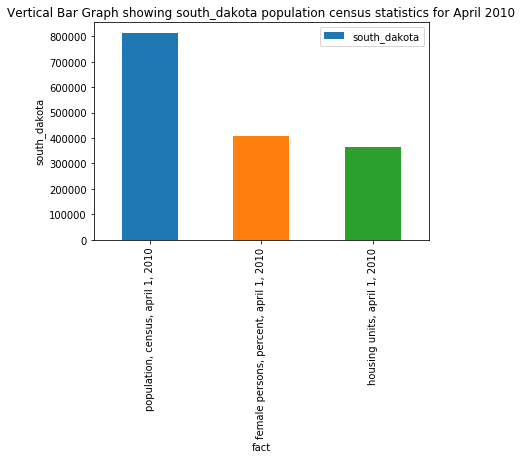

In [556]:
# plotting a vertical bar graph showing south_dakota population census statistics for April 2010 

sample_data_0.plot(x='fact',y='south_dakota',kind='bar');

plt.xlabel('fact');
plt.ylabel('south_dakota');
plt.legend();
plt.title('Vertical Bar Graph showing south_dakota population census statistics for April 2010'); 

Female persons are generally half the total population count across three states, that is, south_dakota, california and alabama. They are also slightly higher than the number of housing units per state which creates a somewhat near direct proportionality between female persons and housing units.


<a id='conclusions'></a>
## Drawing Conclusions

The state of California has the highest gun crime risk because it has the highest number of long_guns and hand_guns sold out to its population. 

The state of South Dakota poses the lowest gun crime risk because it has the lowest number of long and hand_guns sold out to its population. It appears to be the safest among the sampled 7 states.

Females and housing units across all  7 states have a near linear relationship in the month of April 2010.

Permits and long_guns have a 50-50 direct and inverse proportionality relationship. Sometimes an increase in permits leads to a decrease in long_guns and a decrease in permits leads to an increase in long_guns.




## Q1 Which state from the sample data set has the highest risk for gun crime in April 2010?

In [557]:
# adding a new column to the sample 1 dataset to return a sum of values for the hand_gun and long_gun data columns 
# the new column is titled total_gun

sample_data_1['total_gun'] = (sample_data_1['hand_gun'] + sample_data_1['long_gun'])

In [558]:
# checking for new total_gun data column to confirm new changes

sample_data_1

,month,state,permit,hand_gun,long_gun,total_gun
4895,2010-04-01,alabama,396,8727,8095,16822
4898,2010-04-01,arkansas,4303,3865,3833,7698
4899,2010-04-01,california,26930,26170,27650,53820
4938,2010-04-01,south_carolina,4330,5313,3336,8649
4939,2010-04-01,south_dakota,0,1396,2785,4181
4946,2010-04-01,washington,6830,10384,7986,18370
4947,2010-04-01,west_virginia,0,3927,4534,8461


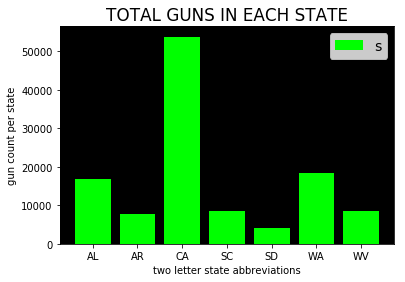

In [559]:
# plotting a matplotlib vertical bar graph to show the total number of guns per state in April 2010

plt.bar(sample_data_1['state'],sample_data_1['total_gun'],color = 'lime'); # state for x axis and total_gun for y axis 
plt.axes().set_xticklabels(['AL', 'AR', 'CA', 'SC', 'SD', 'WA', 'WV']); # assigning state names two letter abbreviations 
plt.rcParams.update({'font.size':14}); # changing chart labels and values to font size 14
plt.axes().set_facecolor('black'); # changing chart background color to black 
plt.title("TOTAL GUNS IN EACH STATE"); # assigning title label
plt.xlabel("two letter state abbreviations"); # assigning x axis label
plt.ylabel("gun count per state"); # assigning y axis label 
plt.legend('state'); # state label
plt.show(); # displaying the vertical bar graph

In [560]:
# returning highest number of total guns in the total_gun data column
sample_data_1['total_gun'].max()

53820

In [561]:
# returning row index label of maximum value in total_gun data column
sample_data_1['total_gun'].idxmax()

4899

California, denoted by CA, is the state that poses the highest risk for potential gun crime with a total tally of 53820 guns at the row index label of 4899 as illustrated in the vertical bar garph above

## Q2 Which state from the sample data set has the lowest risk for potential gun crime in April 2010?

In [562]:
# returning the lowest number of total guns in the total_gun data column
sample_data_1['total_gun'].min()

4181

In [563]:
# returning the row index label for the minimum value in the total_gun data column
sample_data_1['total_gun'].idxmin()

4939

South_Dakota is the state that has the lowest risk for potential gun crime in April 2010 with a gun tally of 4181 guns and an index row label of 4939 as illustrated in the vertical bar graph and the Pandas DataFrame

## Q3 What is the general relationship between female and housing unit populations across all states in the sample data set in April 2010?

In [564]:
a = sample_data_0 # assigning 'a' as a new variable name to sample_data_0 pandas DataFrame

In [565]:
b = a.T # performing a transpose operation on 'a' pandas DataFrame and storing it into a new variable.

In [566]:
b.columns = b.iloc[0] # converting row index for fact details to the column header

In [567]:
c = b.drop('fact') # deleting the row duplicate in our new DataFrame to ease visual display of columns of interest

In [568]:
c = c[['female persons, percent, april 1, 2010', 'housing units, april 1, 2010']] # Dropping one column related to total population 
                                                                                  # to retain the rest in DataFrame

In [569]:
c # displaying the newly trimmed DataFrame

fact,"female persons, percent, april 1, 2010","housing units, april 1, 2010"
alabama,2461564,2171853
arkansas,1484202,1316299
california,18738740,13680081
south_carolina,2377437,2137683
south_dakota,407090,363438
washington,3375719,2885677
west_virginia,939468,881917


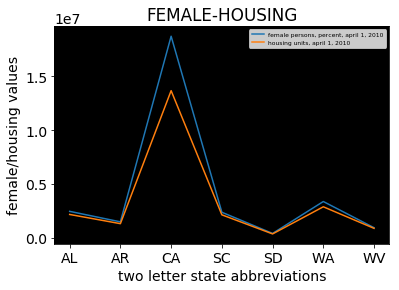

In [570]:
c.plot();

plt.rcParams.update({'font.size':14}); # changing chart labels and values to font size 14
plt.axes().set_facecolor('black'); # changing chart background color to black 
plt.axes().set_xticklabels(['0','AL', 'AR', 'CA', 'SC', 'SD', 'WA', 'WV']); # assigning state names two letter abbreviations 
plt.title("FEMALE-HOUSING"); # assigning title label
plt.xlabel("two letter state abbreviations"); # assigning x axis label
plt.ylabel("female/housing values"); # assigning y axis label
plt.legend(loc='upper right',fontsize=6);

Female populations are directly proportional to housing units across all states. Whenever there is an increase in female populations, there is an increase in housing units.

## Q4 What is the general relationship between permits and long guns in the sample data set?

In [571]:
# selecting the permit and long_gun data columns only for display in a new pandas DataFrame

df = sample_data_1[['permit','long_gun']]
df

,permit,long_gun
4895,396,8095
4898,4303,3833
4899,26930,27650
4938,4330,3336
4939,0,2785
4946,6830,7986
4947,0,4534


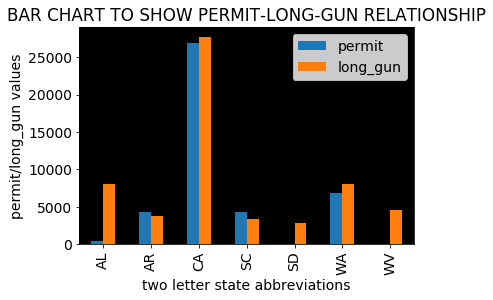

In [572]:
# plotting a line chart to show relationship between permits and long_guns

df.plot.bar();
plt.axes().set_xticklabels(['AL', 'AR', 'CA', 'SC', 'SD', 'WA', 'WV']); # assigning state names two letter abbreviations 
plt.rcParams.update({'font.size':14}); # changing chart labels and values to font size 14
plt.axes().set_facecolor('black'); # changing chart background color to black 
plt.title("BAR CHART TO SHOW PERMIT-LONG-GUN RELATIONSHIP"); # assigning title label
plt.xlabel("two letter state abbreviations"); # assigning x axis label
plt.ylabel("permit/long_gun values"); # assigning y axis label

According to the line chart above, permits are directly proportional to long_guns. Therefore, an increase in permits will most likely lead to an increase in long_guns.

#### Dependant and Independent variables

In the ncis census dataset, housing units are dependent on the population numbers, that is, the population census variable is an independent variable while the housing unts are a dependent variable.

In the gun dataset, permits are the independent variable while hand_guns and long_guns are the dependent variable.

### Limitations

In the gun_data records, I had intended to include more gun columns, that is, the rentals for hand_guns and rentals for long_guns but these were filled with missing values, that is, the NaN values. So I was forced to exclude them. 

The ncis census dataset doesnot contain any gun related information, this gave me a difficult time as I tried hard to find similar records that I could link together. I was only limited to the state field values.


### List of websites that played a crucial role in research

www.towardsdatascience.com

www.geeksforgeeks.org

www.tutorialspoint.com


In [573]:
from subprocess import call # importing the call module from the subprocess package
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb']) # converting jupyter notebook into Ipython notebook 
                                                                   # saving it into the virtual workspace 
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.html'])  # converting the jupyter notebook into an html file 
                                                                   # saving it into the virtual workspace

1